--- First 6 Rows of Data ---
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
--- Summary of Data ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0

<ipython-input-1-a84af305e28e>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_simple['age'].fillna(titanic_simple['age'].mean(), inplace=True)
<ipython-input-1-a84af305e28e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_simple['age'].fillna(titanic_simple['age'].mean(), inplace=True)
<ipython-input-1-a84af305e28e>:23: Se

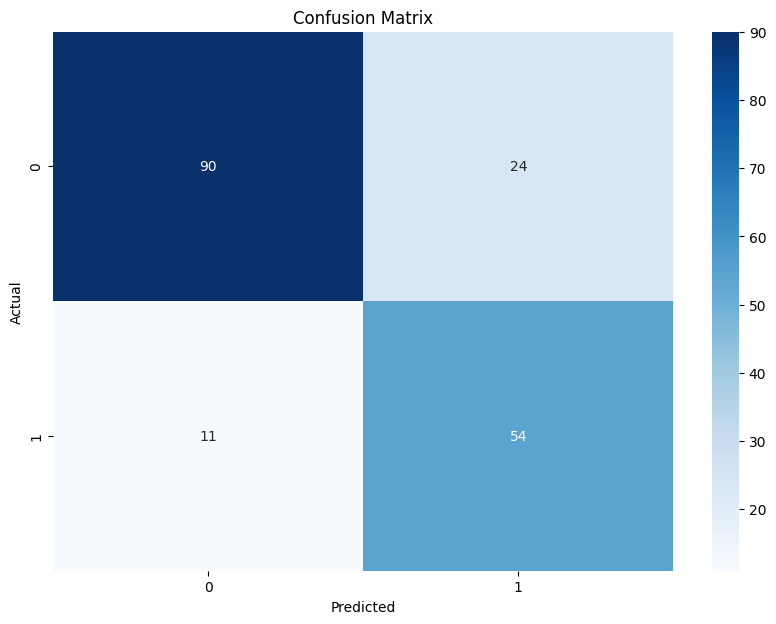

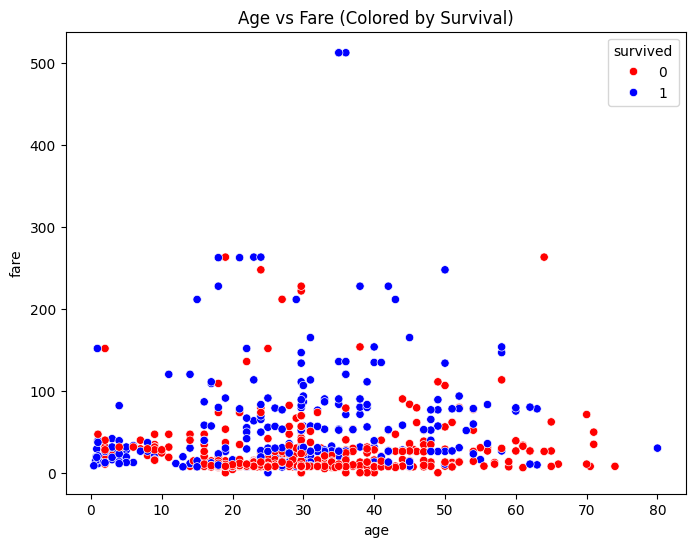

In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset (from seaborn for simplicity)
titanic_df = sns.load_dataset('titanic')

# Display Data Summary
print("--- First 6 Rows of Data ---")
print(titanic_df.head())
print("--- Summary of Data ---")
print(titanic_df.describe())

# Preprocess the Data
titanic_simple = titanic_df[['survived', 'pclass', 'sex', 'age', 'fare']]

titanic_simple['age'].fillna(titanic_simple['age'].mean(), inplace=True)
titanic_simple['sex'] = titanic_simple['sex'].map({'male': 0, 'female': 1})

# Convert 'survived' and 'pclass' to categorical
X = titanic_simple[['pclass', 'sex', 'age', 'fare']]
y = titanic_simple['survived']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the Decision Tree Model
print("--- Building the Decision Tree Model ---")
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("--- Model Trained Successfully ---")

# Validate the Model
predictions = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("--- Confusion Matrix (Test Data) ---")
print(conf_matrix)

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on Test Data: {accuracy:.3f}")

# Visualize Results
print("--- Plotting the Decision Tree ---")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot Age vs Fare (Colored by Survival)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic_simple, x='age', y='fare', hue='survived', palette={0: 'red', 1: 'blue'})
plt.title("Age vs Fare (Colored by Survival)")
plt.show()


In [ ]:
import onnx
print("ONNX version:", onnx.__version__)

import onnxruntime
print("ONNX Runtime version:", onnxruntime.__version__)

ONNX version: 1.17.0
ONNX Runtime version: 1.21.0


In [ ]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the Titanic dataset (from seaborn for simplicity)
import seaborn as sns
titanic_df = sns.load_dataset('titanic')

# Data Preprocessing
titanic_simple = titanic_df[['survived', 'pclass', 'sex', 'age', 'fare']]

# Handling missing values and encoding
titanic_simple['age'] = titanic_simple['age'].fillna(titanic_simple['age'].mean())
titanic_simple['sex'] = titanic_simple['sex'].map({'male': 0, 'female': 1})

# Feature and label separation
X = titanic_simple[['pclass', 'sex', 'age', 'fare']]
y = titanic_simple['survived']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Build the Decision Tree Model
print("--- Building the Decision Tree Model ---")
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
print("--- Model Trained Successfully ---")

# Validate the Model
predictions = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("--- Confusion Matrix (Test Data) ---")
print(conf_matrix)

# Calculate Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on Test Data: {accuracy:.3f}")

# Convert the trained model to ONNX format
print("--- Converting Model to ONNX Format ---")
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(tree_model, initial_types=initial_type)

# Save the ONNX model
onnx_file = "decision_tree_titanic.onnx"
with open(onnx_file, "wb") as f:
    f.write(onnx_model.SerializeToString())
print(f"--- Model successfully converted and saved as {onnx_file} ---")


--- Building the Decision Tree Model ---
--- Model Trained Successfully ---
--- Confusion Matrix (Test Data) ---
[[91 23]
 [13 52]]
Model Accuracy on Test Data: 0.799
--- Converting Model to ONNX Format ---
--- Model successfully converted and saved as decision_tree_titanic.onnx ---


<ipython-input-3-4abba65708f9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_simple['age'] = titanic_simple['age'].fillna(titanic_simple['age'].mean())
<ipython-input-3-4abba65708f9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_simple['sex'] = titanic_simple['sex'].map({'male': 0, 'female': 1})


In [ ]:
import onnxruntime as rt
import numpy as np

# Load the ONNX model
onnx_file = "decision_tree_titanic.onnx"
session = rt.InferenceSession(onnx_file)

# Prepare test data as a numpy array (using the test data from earlier)
test_input = X_test.values.astype(np.float32)

# Get the input name for the ONNX model
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Perform inference
print("--- Running Inference with ONNX Model ---")
pred_onx = session.run([output_name], {input_name: test_input})[0]

# Compare ONNX predictions with original predictions
accuracy_onnx = accuracy_score(y_test, pred_onx)
print(f"ONNX Model Accuracy on Test Data: {accuracy_onnx:.3f}")


--- Running Inference with ONNX Model ---
ONNX Model Accuracy on Test Data: 0.799
